In [19]:
import pandas as pd

df = pd.read_csv('各鄉鎮市區人口密度.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376 entries, 0 to 375
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   statistic_yyy       371 non-null    object
 1   site_id             375 non-null    object
 2   people_total        371 non-null    object
 3   area                371 non-null    object
 4   population_density  371 non-null    object
dtypes: object(5)
memory usage: 14.8+ KB


In [20]:
df.iloc[:10]

,statistic_yyy,site_id,people_total,area,population_density
0,統計年,區域別,年底人口數,土地面積,人口密度
1,106,新北市板橋區,551480,23.1373,23835
2,106,新北市三重區,387484,16.317,23747
3,106,新北市中和區,413590,20.144,20532
4,106,新北市永和區,222585,5.7138,38956
5,106,新北市新莊區,416524,19.7383,21102
6,106,新北市新店區,302089,120.2255,2513
7,106,新北市樹林區,184149,33.1288,5559
8,106,新北市鶯歌區,86593,21.1248,4099
9,106,新北市三峽區,114926,191.4508,600


In [21]:
df.iloc[-10:]

,statistic_yyy,site_id,people_total,area,population_density
366,106,連江縣北竿鄉,2360,9.9,238
367,106,連江縣莒光鄉,1624,4.7,346
368,106,連江縣東引鄉,1352,3.8,356
369,106,東沙群島,…,2.38,…
370,106,南沙群島,…,0.5045,…
371,NaN,NaN,NaN,NaN,NaN
372,NaN,說明：1.人口密度係指每單位土地面積內之人口數。,NaN,NaN,NaN
373,NaN,2.96年12月起，我國土地面積增列東沙群島(2.38平方公里)及南沙群島(0.4896平方公里),NaN,NaN,NaN
374,NaN,，由高雄市代管；原金門縣烏坵鄉面積，因重測由2.6平方公里修正為1.2平方公里。,NaN,NaN,NaN
375,NaN,3.104年12月南沙太平島交通基礎整建工程竣工，增加面積0.0149平方公里。,NaN,NaN,NaN


In [22]:
df1 = df.dropna()
df1.tail()
df1.head()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 371 entries, 0 to 370
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   statistic_yyy       371 non-null    object
 1   site_id             371 non-null    object
 2   people_total        371 non-null    object
 3   area                371 non-null    object
 4   population_density  371 non-null    object
dtypes: object(5)
memory usage: 17.4+ KB


In [23]:
df1.head()

,statistic_yyy,site_id,people_total,area,population_density
0,統計年,區域別,年底人口數,土地面積,人口密度
1,106,新北市板橋區,551480,23.1373,23835
2,106,新北市三重區,387484,16.317,23747
3,106,新北市中和區,413590,20.144,20532
4,106,新北市永和區,222585,5.7138,38956


In [24]:
df2 = df1.rename(columns = df1.iloc[0].to_dict())
df2

,統計年,區域別,年底人口數,土地面積,人口密度
0,統計年,區域別,年底人口數,土地面積,人口密度
1,106,新北市板橋區,551480,23.1373,23835
2,106,新北市三重區,387484,16.317,23747
3,106,新北市中和區,413590,20.144,20532
4,106,新北市永和區,222585,5.7138,38956
...,...,...,...,...,...
366,106,連江縣北竿鄉,2360,9.9,238
367,106,連江縣莒光鄉,1624,4.7,346
368,106,連江縣東引鄉,1352,3.8,356
369,106,東沙群島,…,2.38,…


In [25]:
df3 = df2.drop(index=0)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 370 entries, 1 to 370
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   統計年     370 non-null    object
 1   區域別     370 non-null    object
 2   年底人口數   370 non-null    object
 3   土地面積    370 non-null    object
 4   人口密度    370 non-null    object
dtypes: object(5)
memory usage: 17.3+ KB


In [33]:
import numpy as np
df3['年底人口數'].astype(np.int32)

1      551480
2      387484
3      413590
4      222585
5      416524
        ...  
366      2360
367      1624
368      1352
369         0
370         0
Name: 年底人口數, Length: 370, dtype: int32

In [27]:
import numpy as np
def str_to_int(value:str) ->int:
    try:
        value_int = int(value)
    except:
        value_int = 0
    return value_int

def str_to_float(value:str) ->float:
    try:
        value_float = float(value)
    except:
        value_float = 0
    return value_float


df3['年底人口數'] = df3['年底人口數'].map(str_to_int)
df3['人口密度'] = df3['人口密度'].map(str_to_int)
df3['土地面積'] = df3['土地面積'].map(str_to_float)

In [28]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 370 entries, 1 to 370
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   統計年     370 non-null    object 
 1   區域別     370 non-null    object 
 2   年底人口數   370 non-null    int64  
 3   土地面積    370 non-null    float64
 4   人口密度    370 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 17.3+ KB


In [29]:
df3

,統計年,區域別,年底人口數,土地面積,人口密度
1,106,新北市板橋區,551480,23.1373,23835
2,106,新北市三重區,387484,16.3170,23747
3,106,新北市中和區,413590,20.1440,20532
4,106,新北市永和區,222585,5.7138,38956
5,106,新北市新莊區,416524,19.7383,21102
...,...,...,...,...,...
366,106,連江縣北竿鄉,2360,9.9000,238
367,106,連江縣莒光鄉,1624,4.7000,346
368,106,連江縣東引鄉,1352,3.8000,356
369,106,東沙群島,0,2.3800,0


In [30]:
def splite(value:str) ->str:
    if len(value) > 4 :
        return value[:3]
    else:
        return value
df3['縣市'] = df3['區域別'].map(splite)

In [31]:
df4 = df3.reindex(columns=['縣市','區域別','年底人口數','土地面積','人口密度'])
df4

,縣市,區域別,年底人口數,土地面積,人口密度
1,新北市,新北市板橋區,551480,23.1373,23835
2,新北市,新北市三重區,387484,16.3170,23747
3,新北市,新北市中和區,413590,20.1440,20532
4,新北市,新北市永和區,222585,5.7138,38956
5,新北市,新北市新莊區,416524,19.7383,21102
...,...,...,...,...,...
366,連江縣,連江縣北竿鄉,2360,9.9000,238
367,連江縣,連江縣莒光鄉,1624,4.7000,346
368,連江縣,連江縣東引鄉,1352,3.8000,356
369,東沙群島,東沙群島,0,2.3800,0


In [37]:
def population(value:int) ->str:
    if value >367653:
        return '人多'
    elif value >183826:
        return '適中'
    else:
        return '人少'

df4['人口分布'] = df4['年底人口數'].map(population)
df4

,縣市,區域別,年底人口數,土地面積,人口密度,人口分布
1,新北市,新北市板橋區,551480,23.1373,23835,人多
2,新北市,新北市三重區,387484,16.3170,23747,人多
3,新北市,新北市中和區,413590,20.1440,20532,人多
4,新北市,新北市永和區,222585,5.7138,38956,適中
5,新北市,新北市新莊區,416524,19.7383,21102,人多
...,...,...,...,...,...,...
366,連江縣,連江縣北竿鄉,2360,9.9000,238,人少
367,連江縣,連江縣莒光鄉,1624,4.7000,346,人少
368,連江縣,連江縣東引鄉,1352,3.8000,356,人少
369,東沙群島,東沙群島,0,2.3800,0,人少


In [35]:
pd.cut(df4['年底人口數'],bins=3)

1        (367653.333, 551480.0]
2        (367653.333, 551480.0]
3        (367653.333, 551480.0]
4      (183826.667, 367653.333]
5        (367653.333, 551480.0]
                 ...           
366       (-551.48, 183826.667]
367       (-551.48, 183826.667]
368       (-551.48, 183826.667]
369       (-551.48, 183826.667]
370       (-551.48, 183826.667]
Name: 年底人口數, Length: 370, dtype: category
Categories (3, interval[float64, right]): [(-551.48, 183826.667] < (183826.667, 367653.333] < (367653.333, 551480.0]]

In [38]:
!pip install seaborn

/tmp/ipykernel_2432/1296263605.py:18: UserWarning: Glyph 21335 (\N{CJK UNIFIED IDEOGRAPH-5357}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2432/1296263605.py:18: UserWarning: Glyph 25237 (\N{CJK UNIFIED IDEOGRAPH-6295}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2432/1296263605.py:18: UserWarning: Glyph 32291 (\N{CJK UNIFIED IDEOGRAPH-7E23}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2432/1296263605.py:18: UserWarning: Glyph 27801 (\N{CJK UNIFIED IDEOGRAPH-6C99}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2432/1296263605.py:18: UserWarning: Glyph 32676 (\N{CJK UNIFIED IDEOGRAPH-7FA4}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2432/1296263605.py:18: UserWarning: Glyph 23798 (\N{CJK UNIFIED IDEOGRAPH-5CF6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2432/1296263605.py:18: UserWarning: Glyph 22025 (\N{CJK UNIFIED IDEOGRAPH-5609}

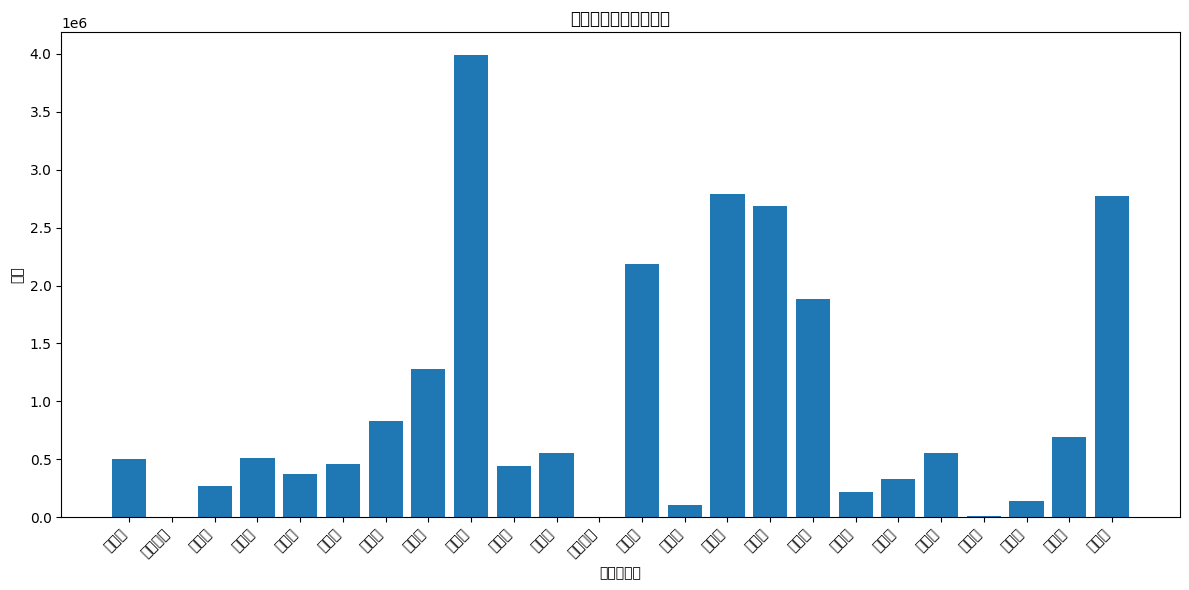

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ... (Your existing code from lesson8_4.ipynb) ...

# Select relevant columns
df_plot = df4[['縣市', '年底人口數']]
df5 = df4.groupby(by='縣市')[['年底人口數']].sum()
df5
# Create the histogram
plt.figure(figsize=(12, 6))
plt.bar(x=df5.index,height=df5['年底人口數'])
plt.xlabel('年底人口數')
plt.ylabel('次數')
plt.title('各縣市人口數量分布圖')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()